In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fast')

import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS
import random
import textwrap

## Dropped rows (with null):
> • Precipitation(in) (1998358)<br>• End_Lat (2246264)<br>• End_Lng (2246264)<br>• Number (1917605)<br>• Wind_Chill(F) (1852623)<br>• Airport_Code (5691)<br>• Pressure(in) (48142)<br>• Wind_Direction (45101)<br>• Timezone (3163)

---
## Dropped rows (no null):
> • ID<br>• Source<br>• Country<br>• Street (157,947 street names)<br>• Turning_Loop (because all False)

In [2]:
df = pd.read_csv('data/3-accidents-dummies-next.csv')

In [3]:
df.shape

(2898031, 33)

In [4]:
df.drop('Unnamed: 0', 1, inplace=True)

In [5]:
df.head()

,TMC,Severity,Start_Time,End_Time,Distance(mi),Side,City,County,State,Zipcode,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,R,Dayton,Montgomery,OH,45424,...,0,0,0,0,0,0,0,0,0,0
1,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,L,Reynoldsburg,Franklin,OH,43068,...,0,0,0,0,0,0,0,0,0,1
2,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,R,Williamsburg,Clermont,OH,45176,...,0,0,0,0,0,1,0,0,1,1
3,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,R,Dayton,Montgomery,OH,45417,...,0,0,0,0,0,0,0,1,1,1
4,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,R,Dayton,Montgomery,OH,45459,...,0,0,0,0,0,1,1,1,1,1


In [6]:
state_df = df.State.value_counts().to_frame()

In [7]:
state_df.reset_index(inplace=True)

In [8]:
state_df

,index,State
0,CA,645967
1,TX,290931
2,FL,219740
3,SC,143349
4,NC,141354
5,NY,136107
6,PA,88866
7,MI,88390
8,IL,86056
9,GA,82215


In [9]:
state_df.rename(columns={'index': 'State', 'State':'Frequency'}, inplace=True)

In [10]:
state_df.sort_values(by='State', inplace=True)

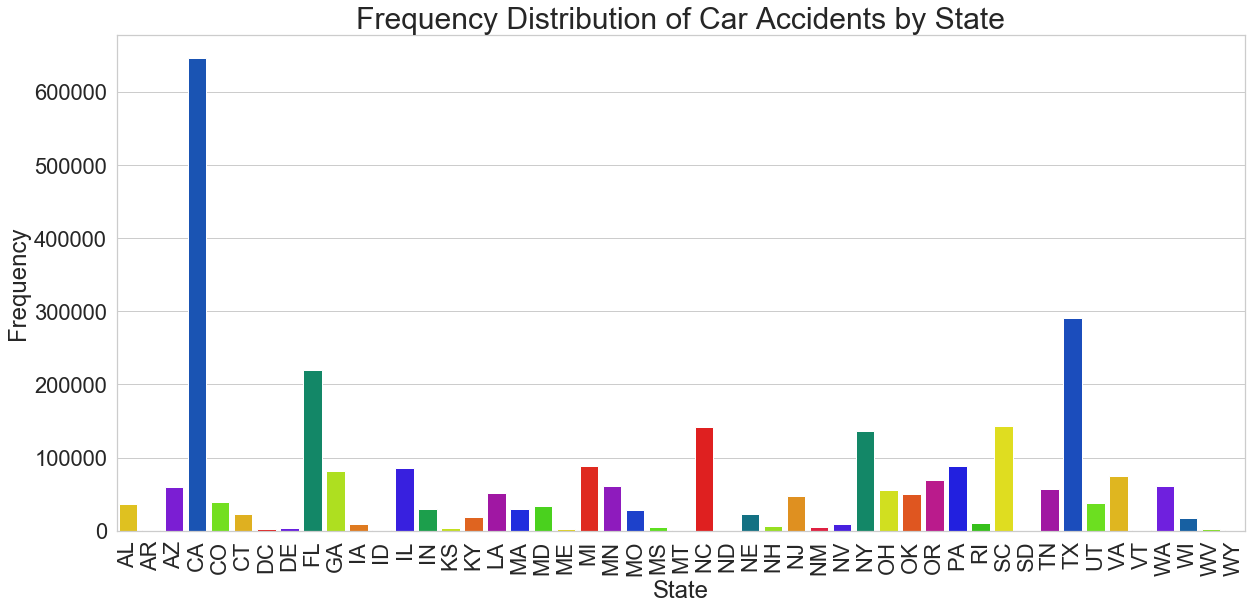

In [11]:
sns.set(style='whitegrid',
        palette='CMRmap',
        font_scale=2, 
        color_codes=True)

fig, ax = plt.subplots(figsize=(18,9))
ax = sns.barplot('State', y='Frequency',
                data=state_df,
                palette='prism_r')
ax.set_xticklabels(ax.get_xticklabels(),
                  rotation=90)
ax.set_title('Frequency Distribution of Car Accidents by State',
            fontsize=30)
plt.tight_layout()
plt.savefig('img/Frequency_dist_by_state.jpg')

In [12]:
city_df = df.City.value_counts().to_frame()

In [13]:
city_df.reset_index(inplace=True)

In [14]:
city_df.rename(columns={'index': 'City', 'City': 'Count'}, inplace=True)

In [15]:
city_df

,City,Count
0,Houston,91003
1,Charlotte,67872
2,Los Angeles,65400
3,Austin,58027
4,Dallas,57688
...,...,...
11502,Fairchance,1
11503,Adin,1
11504,Jena,1
11505,Cuthbert,1


In [16]:
(91003/2898031) * 300

9.420499642688432

In [17]:
total_acc = np.sum(city_df.Count)

In [18]:
total_acc

2898031

In [19]:
city_df.Count.values

array([91003, 67872, 65400, ...,     1,     1,     1])

In [20]:
city_df['City'] = city_df['City'].str.replace(' ', '_')

In [21]:
city_df.sample(10)

,City,Count
1291,Mankato,305
1204,Schwenksville,338
4987,Tiller,21
6690,Gobles,9
6818,Iron_River,8
6254,Bonnieville,11
1616,Wytheville,217
7760,Gilmanton_Iron_Works,5
662,San_Gabriel,717
3022,Mohegan_Lake,70


In [22]:
just_string = ''
for city, count in zip(city_df.City.values, city_df.Count.values):
        weight = int((count/total_acc) * 1000)
        word = (city + ' ') * weight
        just_string += word

just_string

'Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dalla

In [23]:
stopwords = set(STOPWORDS)

In [69]:
city_cloud = WordCloud(background_color='black', 
                       max_font_size=50,
                      max_words=2500,
                      collocations=False,
                      stopwords=stopwords)

city_cloud.generate(just_string)

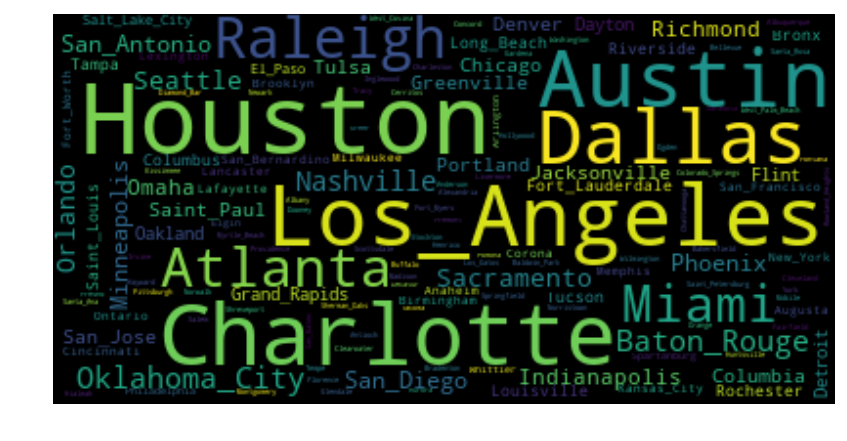

In [70]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(city_cloud, interpolation='bilinear')
plt.axis('off')
# plt.figure(figsize=(12,7))

plt.show()

In [26]:
city_df

,City,Count
0,Houston,91003
1,Charlotte,67872
2,Los_Angeles,65400
3,Austin,58027
4,Dallas,57688
...,...,...
11502,Fairchance,1
11503,Adin,1
11504,Jena,1
11505,Cuthbert,1


In [35]:
df['Side'] = df['Side'].map({'R': 0, 'L': 1, '': 0})

In [42]:
df['Side'].ffill(axis=0, inplace=True)

In [43]:
df['Side'] = df['Side'].astype(int)

In [44]:
df.Side.value_counts()

0    2374354
1     523677
Name: Side, dtype: int64

In [54]:
df.Start_Time.value_counts()

2017-05-15 09:22:55    74
2018-11-25 01:22:49    53
2019-10-26 08:45:17    49
2018-11-12 00:37:27    40
2018-12-18 07:11:45    37
                       ..
2019-09-15 00:56:03     1
2017-11-25 13:39:08     1
2018-09-18 08:03:31     1
2018-06-11 15:52:30     1
2017-04-26 08:39:37     1
Name: Start_Time, Length: 2677031, dtype: int64